In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_one_image(image: np.ndarray) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.
    
    :param image: изображение для отображения
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(8, 7))
    
    axs.imshow(image)
    axs.axis('off')
    plt.plot()

# Задача №1 - Лабиринт

Реализуйте алгоритм поиска выхода из лабиринта по растровому изобажению.
Вам нужно написать код, который будет находить путь (координаты пикселей) от заданного входа сверху до выхода снизу.

Отрисуйте получившийся маршрут на карте с помощью функции ```plot_maze_path(img, coords)``` или воспользуйтесь вам известным графическим инструментом.

__Input:__

Изображение лабиринта в кодировке $RGB$.

Все карты лежат на [яндекс-диске](https://yadi.sk/d/qEWVZk2picDdZw)

__Ouput:__

Массив координат пути через лабиринт в виде ```(np.array(x), np.array(y))```. 

Оценивается __каждое__ успешное решение лабиринта.
Пример решенной задачи.<img src="https://b.radikal.ru/b22/1906/56/df991f2221a7.png" width="300">

In [3]:
def plot_maze_path(image: np.ndarray, coords: tuple) -> np.ndarray:
    """
    Нарисовать путь через лабиринт на изображении. 
    Вспомогательная функция.
     
    :param image: изображение лабиринта
    :param coords: координаты пути через лабиринт типа (x, y) где x и y - массивы координат точек
    :return img_wpath: исходное изображение с отрисованными координатами 
    """
    if image.ndim != 3:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        
    img_wpath = image.copy()
    if len(coords[0]) > 0:
        x, y = coords
        img_wpath[x, y, :] = [0, 0, 255]

    return img_wpath

Загрузим тестовое изображение и отобразим его.

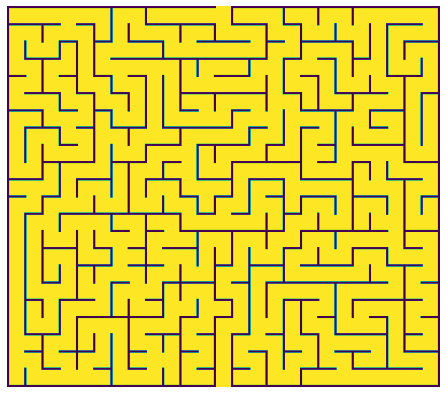

In [297]:
test_image = cv2.imread('maze/25 by 22 orthogonal maze.png', 0)  # загрузить тестовую картинку

plot_one_image(test_image)

Теперь ваша задача реализовать функцию ```plot_maze_path``` в ```task_1.py``` для того, чтобы найти координаты пути через лабиринт.

In [298]:
from skimage.measure import label

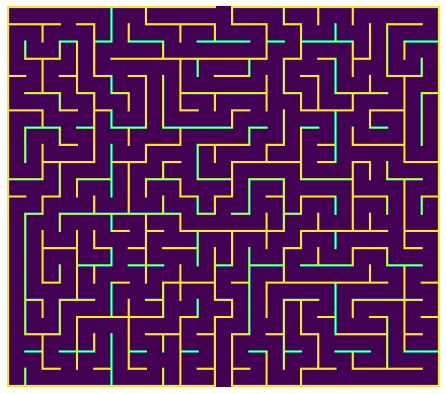

In [300]:
maze = test_image == 0
plot_one_image(maze)

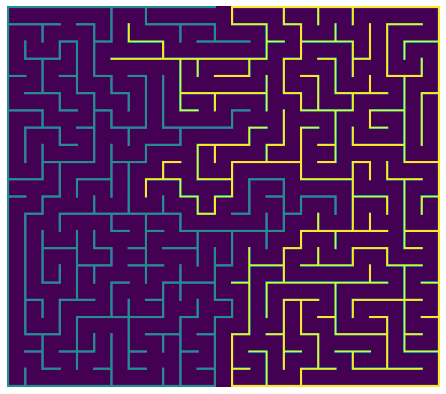

In [301]:
maze = label(maze, connectivity=1)
plot_one_image(maze)

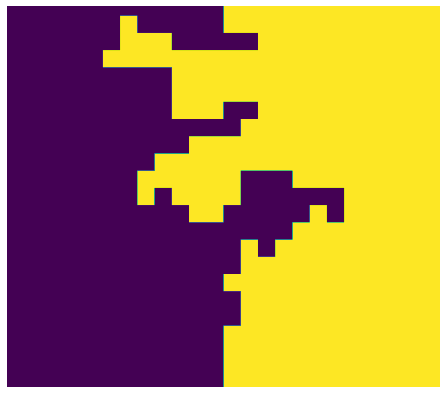

In [302]:
kernel = np.ones((15, 15), np.uint8)
path = cv2.dilate(np.float32(maze), kernel)
plot_one_image(path)

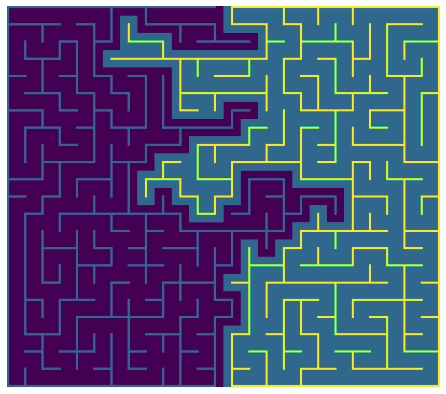

In [303]:
plot_one_image(path + maze)

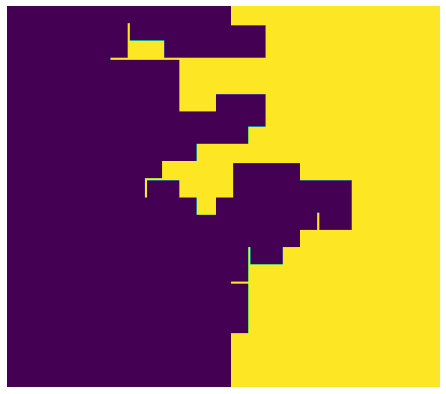

In [304]:
plot_one_image(cv2.erode(np.float32(path), kernel))

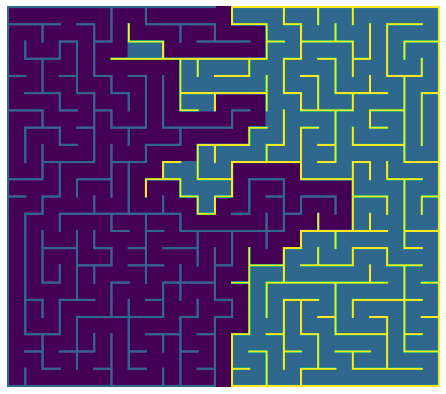

In [305]:
plot_one_image(cv2.erode(np.float32(path), kernel) + maze)

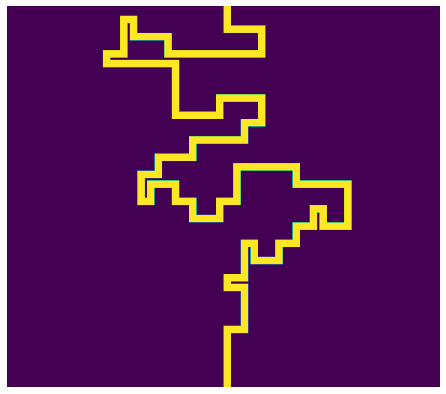

In [306]:
path = path - cv2.erode(np.float32(path), kernel)
plot_one_image(path)

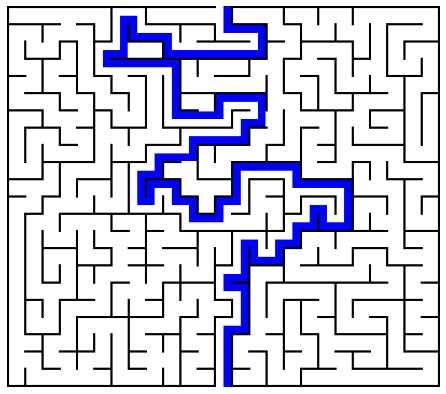

In [307]:
path = np.where(path > 0)
image_with_way = plot_maze_path(test_image, path)

plot_one_image(image_with_way)

# Задача №2 - Пробки в городе

Требуется написать программу, которая на вход принимает картинку, на которой схематически изображена машинка на дороге с $N$ полосами и препятствия на полосах. Соответствующие объекты обозначены цветами, которые сохраняются на всех изображениях. 

Результатом работы программы является номер полосы, на которую нужно перестроиться или сообщение о том, что перестраиваться не нужно.

**Примечание: номер дороги считается слева направо, отсчет начинается с нуля.**

Примеры изображений:
<table><tr>
    <td> <img src="https://i.ibb.co/8z84sJG/image_00.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/Z6m4XFz/image_01.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

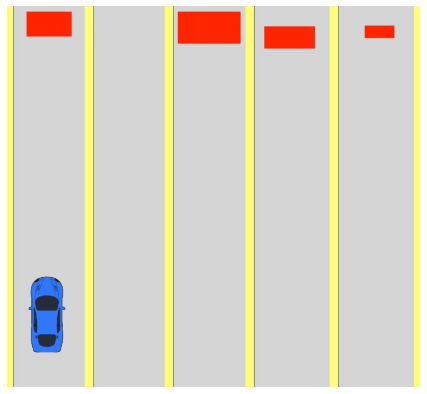

In [273]:
test_image = cv2.imread('trafic/image_00.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

plot_one_image(test_image)

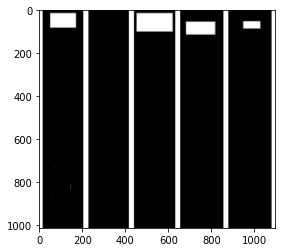

In [244]:
r_only = test_image[:, :, 0]
r_only[r_only < 220] = 0
plt.imshow(r_only, cmap='gray')

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15  208  209  210  211  212  213  214  215  216  217  218  219
  220  221  222  223  224  225  226  227  228  229  420  421  422  423
  424  425  426  427  428  429  430  431  432  433  434  435  436  437
  438  439  440  441  634  635  636  637  638  639  640  641  642  643
  644  645  646  647  648  649  650  651  652  653  654  655  858  859
  860  861  862  863  864  865  866  867  868  869  870  871  872  873
  874  875  876  877  878  879 1082 1083 1084 1085 1086 1087 1088 1089
 1090 1091 1092 1093 1094 1095 1096 1097] [[ 15]
 [ 37]
 [ 59]
 [ 81]
 [103]]
[  15  229  441  655  879 1082]


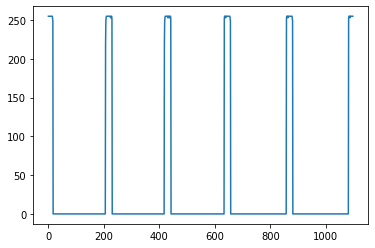

In [274]:
lines = r[800]
plt.plot(lines)

lines_coord = np.argwhere(lines > 250).squeeze()
diff_lines = np.diff(lines_coord)
tmp_coord = np.argwhere(diff_lines > 1)


print(lines_coord, coord)
lines_pix_idx = []
for crd in tmp_coord:
    lines_pix_idx.append(lines_coord[crd][0])

lines_pix_idx.append(lines_coord[crd[-1] + 1])
lines_pix_idx = np.array(lines_pix_idx)
print(lines_pix_idx)

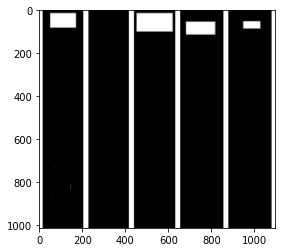

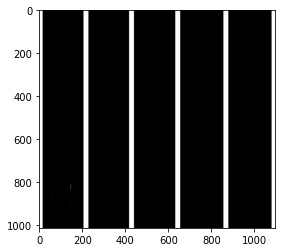

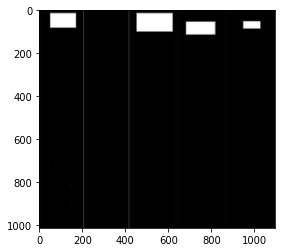

In [279]:
r_only = test_image[:, :, 0]
r_only[r_only < 220] = 0
plt.imshow(r_only, cmap='gray')
plt.show()

g_only = test_image[:, :, 1]
g_only[g_only < 220] = 0
plt.imshow(g_only, cmap='gray')
plt.show()

only_block = r_only - g_only
plt.imshow(only_block, cmap='gray')

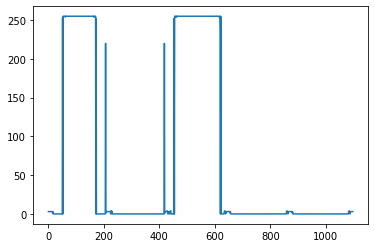

In [296]:
lines_coord = only_block[30]
plt.plot(lines_coord)

# lines_coord = np.argwhere(lines_coord > 250).squeeze()
diff_lines = np.diff(lines_coord)
tmp_coord = np.argwhere(diff_lines > 1)

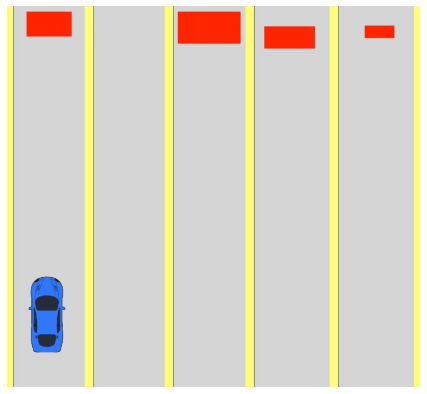

In [16]:
test_image = cv2.imread('trafic/image_00.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

plot_one_image(test_image)

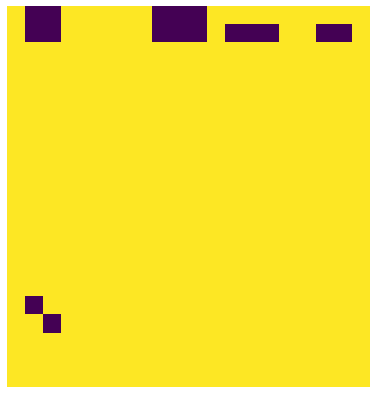

In [17]:
x, y = test_image[:, :, 2].shape
ret, img = cv2.threshold(test_image, 127, 255, cv2.THRESH_BINARY)
img = img[:, :, 2]
img = cv2.resize(img, (x // 50, y // 50))
plot_one_image(img)

In [18]:
img1 = img[:(img.shape[0] // 4), :]  # на основе предположение, что машина внизу

x, y = np.where(img1 == 0)
y = np.unique(y)
if y[0] > 2:
    space = 0 
elif y[-1] < img.shape[1] - 2:
    diff_y = np.diff(y)
    diff_y = diff_y[diff_y > 1]
    space = len(diff_y) + 1
else:
    diff_y = np.diff(y)
    diff_y = diff_y[diff_y > 1]
    space = np.argmax(diff_y) + 1

img2 = img[(img.shape[0]//4):, :]
x_car, y_car = np.where(img2 == 0)
y_car = np.unique(y_car)
car_pos = np.where(y_car[0] == y)

if car_pos != space:
    print(f'Нужно перестроиться на дорогу номер {space}')
else:
    print("Не нужно перестраиваться")

Нужно перестроиться на дорогу номер 1


# Задача №3 - Аффинные преобразования

## Задача №3.1 - Поверни изображение

Реализуйте функцию, которая поворачивает изображение вокруг заданной точки на заданный угол ($0^\circ-360^\circ$) и преобразует размер изображения, чтобы оно не обрезалось после поворота.

In [19]:
from itertools import combinations as cm

def applyAffineSafe(image, M):
    """
    Позволяет произвети афинное преобразование с сохранением контента 
    
    :param image: исходное изображение
    :param M: матрица преобразования 
    (пока я написал только для матриц 2x3, опираясь на конкретные задачи, но потом можно будет добавить обработку в общем случае)
    :return: преобразованное изображение
    """
    w, h, _ = image.shape
    box = np.array([M @ i for i in ((0, 0, 1), 
                                    (0, w, 1), 
                                    (h, 0, 1), 
                                    (h, w, 1))]) # Найдем края картинки после преобразования
    # Найдем максимальную ширину и высоту опираясь на новые края
    nsize = np.array([max(map(lambda x: (abs(x[0] - x[1])), cm(i, 2))) for i in box.T]) 
    print(nsize)
    # Сделаем перенос, чтобы совместить центр итоговой картинки и центр преобразованной
    M[:,2] += (nsize / 2) - (M @ (h / 2, w / 2, 1))
    return cv2.warpAffine(image.copy(), M, tuple(np.ceil(nsize).astype(int)))

In [194]:
img = cv2.imread("trafic/image_00.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

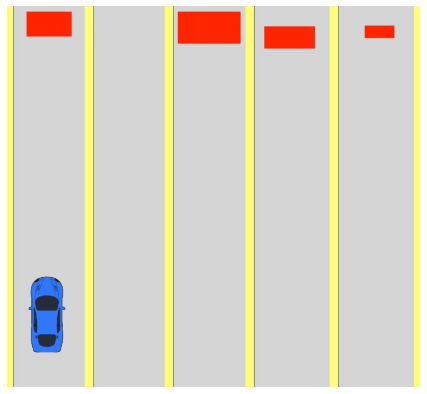

In [195]:
plot_one_image(img)

In [207]:
M = cv2.getRotationMatrix2D([300, 300], 35, scale=1.0)

print(M)

w, h, _ = img.shape
box = np.array([M @ i for i in ((0, 0, 1), 
                                (0, w, 1), 
                                (h, 0, 1), 
                                (h, w, 1))]) # Найдем края картинки после преобразования

box.T

[[   0.81915204    0.57357644 -117.81854419]
 [  -0.57357644    0.81915204  226.32731762]]


array([[-117.81854419,  462.6408094 ,  781.61040044, 1362.06975402],
       [ 226.32731762, 1055.30918644, -403.45960949,  425.52225933]])

In [208]:
for x in box.T:
    print(x)
    for i in cm(x, 2):
        print(i)

[-117.81854419  462.6408094   781.61040044 1362.06975402]
(-117.81854419201136, 462.6408093952473)
(-117.81854419201136, 781.6104004373017)
(-117.81854419201136, 1362.0697540245603)
(462.6408093952473, 781.6104004373017)
(462.6408093952473, 1362.0697540245603)
(781.6104004373017, 1362.0697540245603)
[ 226.32731762 1055.30918644 -403.45960949  425.52225933]
(226.3273176186163, 1055.309186439076)
(226.3273176186163, -403.45960949483225)
(226.3273176186163, 425.52225932562743)
(1055.309186439076, -403.45960949483225)
(1055.309186439076, 425.52225932562743)
(-403.45960949483225, 425.52225932562743)


In [209]:
nsize = np.array([max(map(lambda x: (abs(x[0] - x[1])), cm(i, 2))) for i in box.T]) 

In [210]:
nsize // 2 - np.array(img.shape[:2]) // 2

array([233., 180.])

In [211]:
def func(a, b, c, d):
    print(a, b, c, d)

args = [1 ,2, 3, 4][::-1]

args ={
    'a': 1,
    'b': 2,
    'c': 3,
    'd': 4
}

func(**args)

1 2 3 4


In [212]:
M[:, 2] = M[:, 2] + (nsize // 2 - M @ np.array([img.shape[1] // 2, img.shape[0] // 2, 1]))

In [213]:
# M[:, 2] = M[:, 2] + (nsize // 2 - M @ np.array([*img.shape[:2], 1]) // 2)

In [214]:
M

array([[ 8.19152044e-01,  5.73576436e-01, -9.44149108e-01],
       [-5.73576436e-01,  8.19152044e-01,  6.29402529e+02]])

In [215]:
tuple(np.ceil(nsize))

(1480.0, 1459.0)

In [216]:
img2 = cv2.warpAffine(img, M, tuple(np.ceil(nsize).astype(int)))

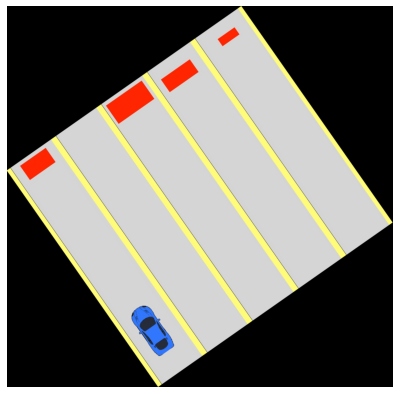

In [217]:
plot_one_image(img2)

In [20]:
def rotate(image, point: tuple, angle: float):
    """
    Повернуть изображение по часовой стрелке на угол от 0 до 360 градусов и преобразовать размер изображения. 
    
    :param image: исходное изображение
    :param point: значение точки (x, y), вокруг которой повернуть изображение
    :param angle: угол поворота 
    :return: повернутное изображение
    """
    M = cv2.getRotationMatrix2D(point, angle, scale=1.0)
    return applyAffineSafe(image, M)

In [21]:
img = cv2.imread("trafic/image_00.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [22]:
rotate(img, (200, 200), 30);

[1456.89589336 1425.41770863]


[1098. 1012.]
[1322.51143091 1261.70024773]
[1456.89589336 1425.41770863]
[1491.9953083 1491.9953083]
[1425.41770863 1456.89589336]
[1261.70024773 1322.51143091]
[1012. 1098.]
[1261.70024773 1322.51143091]
[1425.41770863 1456.89589336]
[1491.9953083 1491.9953083]
[1456.89589336 1425.41770863]
[1322.51143091 1261.70024773]
[1098. 1012.]
[1322.51143091 1261.70024773]
[1456.89589336 1425.41770863]
[1491.9953083 1491.9953083]
[1425.41770863 1456.89589336]
[1261.70024773 1322.51143091]
[1012. 1098.]
[1261.70024773 1322.51143091]
[1425.41770863 1456.89589336]
[1491.9953083 1491.9953083]
[1456.89589336 1425.41770863]
[1322.51143091 1261.70024773]
[1098. 1012.]
[1322.51143091 1261.70024773]
[1456.89589336 1425.41770863]
[1491.9953083 1491.9953083]


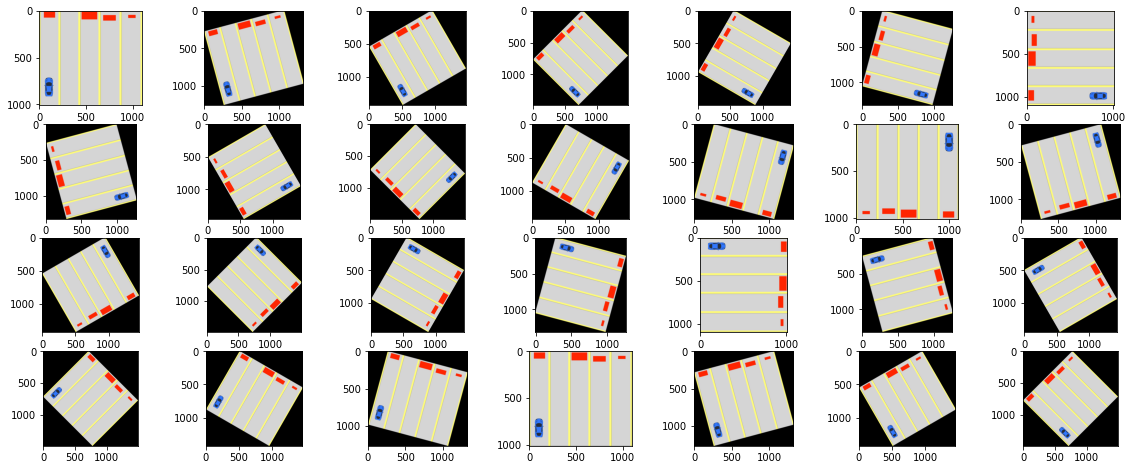

In [23]:
angle = 0
fig, m_axs = plt.subplots(4, 7, figsize=(20, 8))
for i in m_axs.ravel():
    i.imshow(rotate(img, (200, 200), angle))
    angle += 15

## Задача №3.2 - Афинные преобразования

Реализуйте функцию, которая применяет афинное преобразование между заданными точками на исходном изображении и преобразует размер получившегося изображения, чтобы оно не обрезалось.

In [218]:
def apply_warpAffine(image, points1, points2):
    """
    Применить афинное преобразование согласно переходу точек points1 -> points2 и 
    преобразовать размер изображения.
    
    :param image: исходное изображение
    :param points1: исходны точки
    :param points2: преобразованные точки
    :return: преобразованное изображение
    """
    M = cv2.getAffineTransform(points1, points2) 
    return applyAffineSafe(image, M)

In [219]:
img = cv2.imread("trafic/image_00.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

[ 313.71428571 1262.97142857]


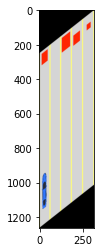

In [220]:
pts1 = np.float32([[50, 50], [400, 50], [50, 200]])
pts2 = np.float32([[100, 100], [200, 20], [100, 250]]) 

plt.imshow(apply_warpAffine(img, pts1, pts2))